<a href="https://colab.research.google.com/github/Jarmos-san/NYCAirbnbOpenData/blob/master/NYC_Airbnb_Open_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [New York City Airbnb Open Data](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data)

---

## Description

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

## Columns

  - `id` - listing ID
  - `name` - name of the listing
  - `host_id` - host ID
  - `host_name` - name of the host
  - `neighbourhood_group` - location
  - `neighbourhood` - area
  - `latitude` - latitude coordinates
  - `longitude` - longitude coordinates
  - `room_type` - listing space type
  - `price` - price in dollars
  - `minimum_nights` - amount of nights minimum
  - `number_of_reviews` - number of reviews
  - `last_review` - latest review
  - `reviews_per_month` - number of reviews per month
  - `calculated_host_listings_count` - amount of listing per host
  - `availability_365` - number of days when listing is available for booking

## Setting Up the Notebook

In [0]:
# Install PyDrive into the Colab instance
!pip install -U -q PyDrive

# Import the required libraries from PyDrive 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive instance.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Get shareable link by right-clicking on the required file from GDrive
shareableLink = 'https://drive.google.com/open?id=1KSGi2vXSEBgbsLQCjzRyh8YZvikuigR7'

# Get a string of numbers
_, id = shareableLink.split('=')

# Create Pandas dataframe
getID = drive.CreateFile({'id':id}) 
getID.GetContentFile('AB_NYC_2019.csv')

# Importing Libraries

---

- **Pandas** *v0.25.3*
- **Seaborn** *v0.9.0*
- **Missingno** *v0.4.2*

In [46]:
# Importing the required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno

# Checking library versions
print(f'Pandas v{pd.__version__}')
print(f'Seaborn v{sns.__version__}')
print(f'Missingno v{missingno.__version__}')
print(f'Numpy v{np.__version__}')

%matplotlib inline
sns.set(style='darkgrid')

Pandas v0.25.3
Seaborn v0.9.0
Missingno v0.4.2
Numpy v1.17.5


# Dataset Overview

---

## **Notes**

- Looks like there are some trivial amount of `ListingName` & `HostName` values missings which can be deailt with quickly.
- `LatestReview` & `ReviewsPerMonth` has 21% of the values missing which needs to be take care of.
- `LatestReview` is supposed to be a `datetime` column but it shows up as an `object` so it's needs to be dealt with.
- Not sure if missing values are a major problem in making visualizations.
- Also it looks like **`Price($)` has a few lowest values as `0`** which seems a bit unusual because it's hihgly unlikely that an Airbnb apartment would be rented out for `$0`!

## Reading Resources

- [Missing Data & Imputation | Towards Data Science](https://towardsdatascience.com/missing-data-and-imputation-89e9889268c8)

- [Imputation of Missing Values | Scikit-Learn](https://scikit-learn.org/stable/modules/impute.html)



## Load Dataset

In [7]:
# Load dataset and print the number of rows & columns
data = pd.read_csv('AB_NYC_2019.csv')
print(f'Number of rows in the dataset is {data.shape[0]}')
print(f'Number of columns in the dataset is {data.shape[1]}')

Number of rows in the dataset is 48895
Number of columns in the dataset is 16


## Check Column Names

In [8]:
# Check the name of the columns
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## Rename Columns

In [9]:
# Rename the columns properly
RenamedColumns = {'id':'ListingID', 
                  'name':'ListingName',
                  'host_id':'HostID', 
                  'host_name': 'HostName',
                  'neighbourhood_group': 'Location',
                  'neighbourhood': 'Area',
                  'latitude': 'Lattitude', 
                  'longitude': 'Longitude', 
                  'room_type': 'RoomType',
                  'price': 'Price($)', 
                  'minimum_nights': 'MinimumNights', 
                  'number_of_reviews': 'NumberOfReviews',
                  'last_review': 'LatestReview', 
                  'reviews_per_month': 'ReviewsPerMonth', 
                  'calculated_host_listings_count': 'ListingsPerHost',
                  'availability_365': 'AnnualAvailability'}
data.rename(RenamedColumns, axis=1, inplace=True)
data.sample(5)

,ListingID,ListingName,HostID,HostName,Location,Area,Lattitude,Longitude,RoomType,Price($),MinimumNights,NumberOfReviews,LatestReview,ReviewsPerMonth,ListingsPerHost,AnnualAvailability
22924,18569422,Private room in beautiful home in Crown Heights,35741929,Assol,Brooklyn,Crown Heights,40.67101,-73.94543,Private room,70,2,52,2018-11-05,1.99,2,0
25901,20692563,Greenwich Village Townhome with Private Garden!,147814925,Lloyd,Manhattan,Greenwich Village,40.73300,-73.99413,Entire home/apt,3900,30,7,2018-03-13,0.32,1,180
7328,5402632,Private BDR/BATH in Luxury Condo near Times Sq...,27927011,Ashley,Manhattan,Hell's Kitchen,40.75755,-73.99305,Private room,99,365,7,2018-03-08,0.14,1,337
13348,10031436,Spacious Sunny room in East Village,51499758,Sabra,Manhattan,Lower East Side,40.71686,-73.98346,Private room,90,4,0,NaN,NaN,1,0
4843,3445138,The Sunniest of Brooklyn Brownstones,17051201,G,Brooklyn,Park Slope,40.67224,-73.97837,Entire home/apt,495,3,15,2019-05-27,0.27,3,198


## Checking Data Statistics

In [10]:
# Checking the statistical description of the dataset
data.describe()

,ListingID,HostID,Lattitude,Longitude,Price($),MinimumNights,NumberOfReviews,ReviewsPerMonth,ListingsPerHost,AnnualAvailability
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Checking for Categorical Values

In [0]:
def checkUniqueValues(columnName):
  list(columnName.unique())

## Rough Look At Missing Values

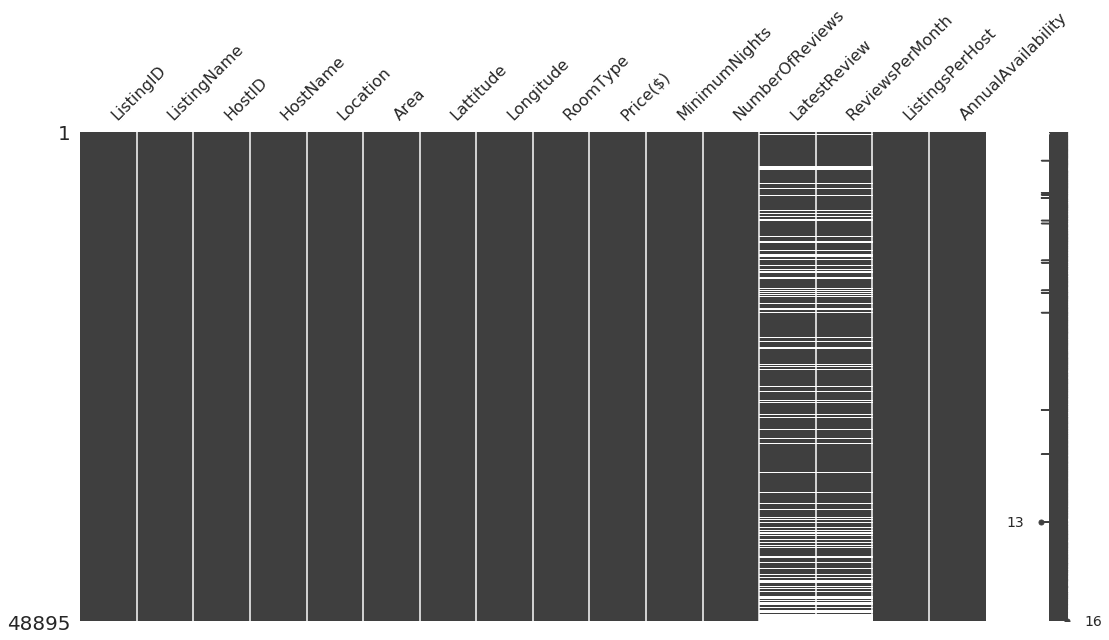

In [11]:
# Graphical overview of the missing values
missingno.matrix(data, figsize=(18,9))

## Checking the Exact Amount of Missing Values

In [12]:
# Checking the number of null values in the whole dataset
totalNullValues = data.isna().sum()
for index, value in totalNullValues.items():
  if value > 0.00000000001:
    print(f'{index}: {value}')

ListingName: 16
HostName: 21
LatestReview: 10052
ReviewsPerMonth: 10052


In [13]:
# Checking the number of missing values in percentage.
nullValuePercent = round(data.isna().sum()/data.shape[0]*100)
for index, value in nullValuePercent.items():
  if value > 0:
    print(f'{index}: {value}%')

LatestReview: 21.0%
ReviewsPerMonth: 21.0%


## Checking the Datatypes

In [14]:
# Checking the data type of the values in each column
data.dtypes

ListingID               int64
ListingName            object
HostID                  int64
HostName               object
Location               object
Area                   object
Lattitude             float64
Longitude             float64
RoomType               object
Price($)                int64
MinimumNights           int64
NumberOfReviews         int64
LatestReview           object
ReviewsPerMonth       float64
ListingsPerHost         int64
AnnualAvailability      int64
dtype: object

# Data Visualizations

- [Introduction to Geospatial Dat in Python | Datacamp](https://www.datacamp.com/community/tutorials/geospatial-data-python)
- [Python Seaborn Tutorial For Beginners](https://www.datacamp.com/community/tutorials/seaborn-python-tutorial)


In [16]:
data.sample(1)

,ListingID,ListingName,HostID,HostName,Location,Area,Lattitude,Longitude,RoomType,Price($),MinimumNights,NumberOfReviews,LatestReview,ReviewsPerMonth,ListingsPerHost,AnnualAvailability
6061,4438029,Chelsea High End Apartment,974868,Jackie,Manhattan,Chelsea,40.74635,-73.99604,Entire home/apt,360,3,28,2019-04-22,0.5,1,128


In [58]:
print(list(data['RoomType'].unique()))
print(list(data['Location'].unique()))

['Private room', 'Entire home/apt', 'Shared room']
['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']


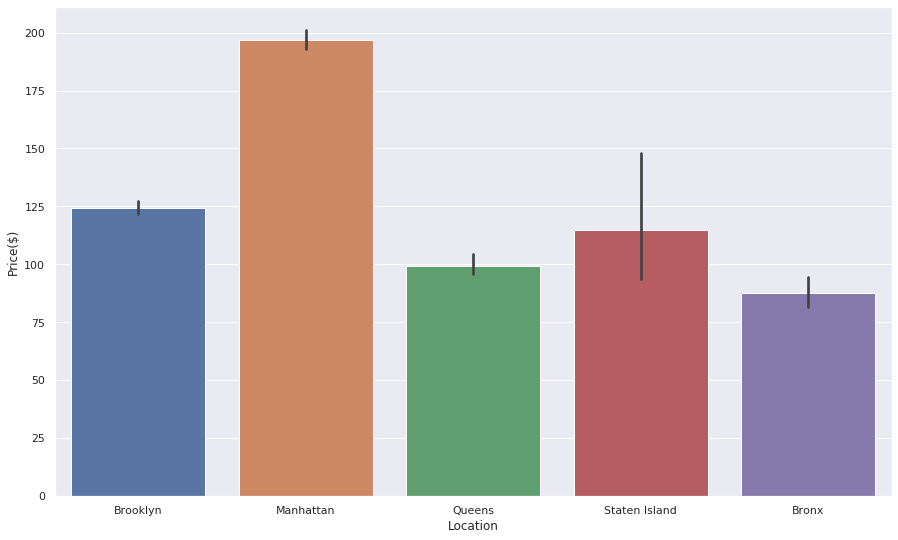

In [51]:
plt.figure(figsize=(15,9))
sns.barplot(x='Location', y='Price($)', data=data)
# plt.savefig('PricesPerLocation.png')

In [0]:
data['Coordinates'] = data.loc[0:, 'Lattitude':'Longitude'].values.tolist()
data['Coordinates']

0        [40.647490000000005, -73.97237]
1         [40.75362, -73.98376999999999]
2         [40.809020000000004, -73.9419]
3        [40.685140000000004, -73.95976]
4                  [40.79851, -73.94399]
                      ...               
38950     [40.80155, -73.96498000000001]
38951              [40.67904, -73.94837]
38952              [40.74772, -73.99146]
38953    [40.728770000000004, -73.98249]
38954                        [40.0, nan]
Name: Coordinates, Length: 38955, dtype: object

# TODO

- Read up on Python functions **(IMPORTANT)**
- Make datasets load dynamically from GDrive according to the mimetypes.
- ~Change Seaborn graph sizes.~
- Create a function to make categorical variables, graphs, etc dynamically.